# Decision Tree

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pydot
import pandas as pd
import mglearn
import os
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [2]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print(f"Accuracy on training set: {tree.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {tree.score(X_test, y_test):.3f}")

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [7]:
cancer.data
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

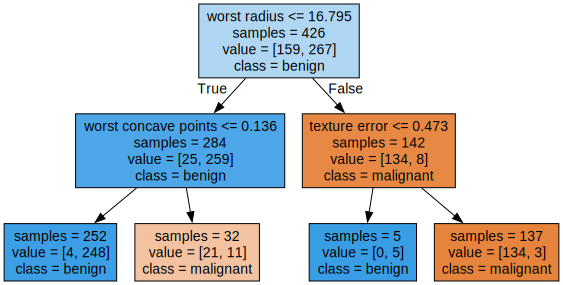

In [17]:
# impurity = False
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [21]:
graph, *_ = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

tree_d4 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_d4.fit(X_train, y_train)
print(f"Accuracy on training set: {tree_d4.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {tree_d4.score(X_test, y_test):.3f}")

Accuracy on training set: 0.988
Accuracy on test set: 0.951


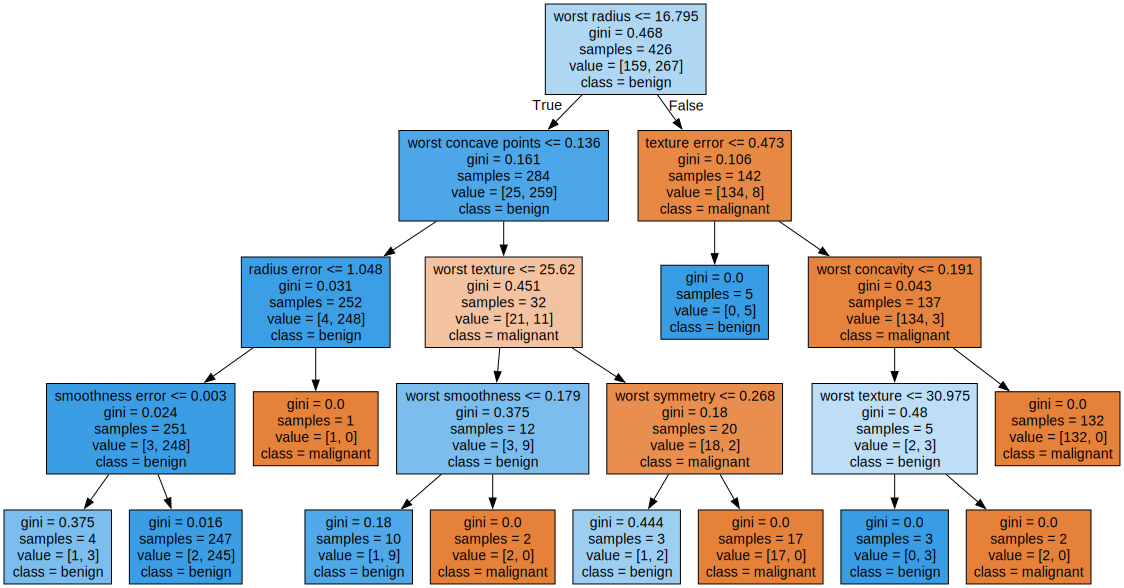

In [7]:
# impurity = True
export_graphviz(tree_d4, out_file="tree_depth4.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=True, filled=True)

with open("tree_depth4.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


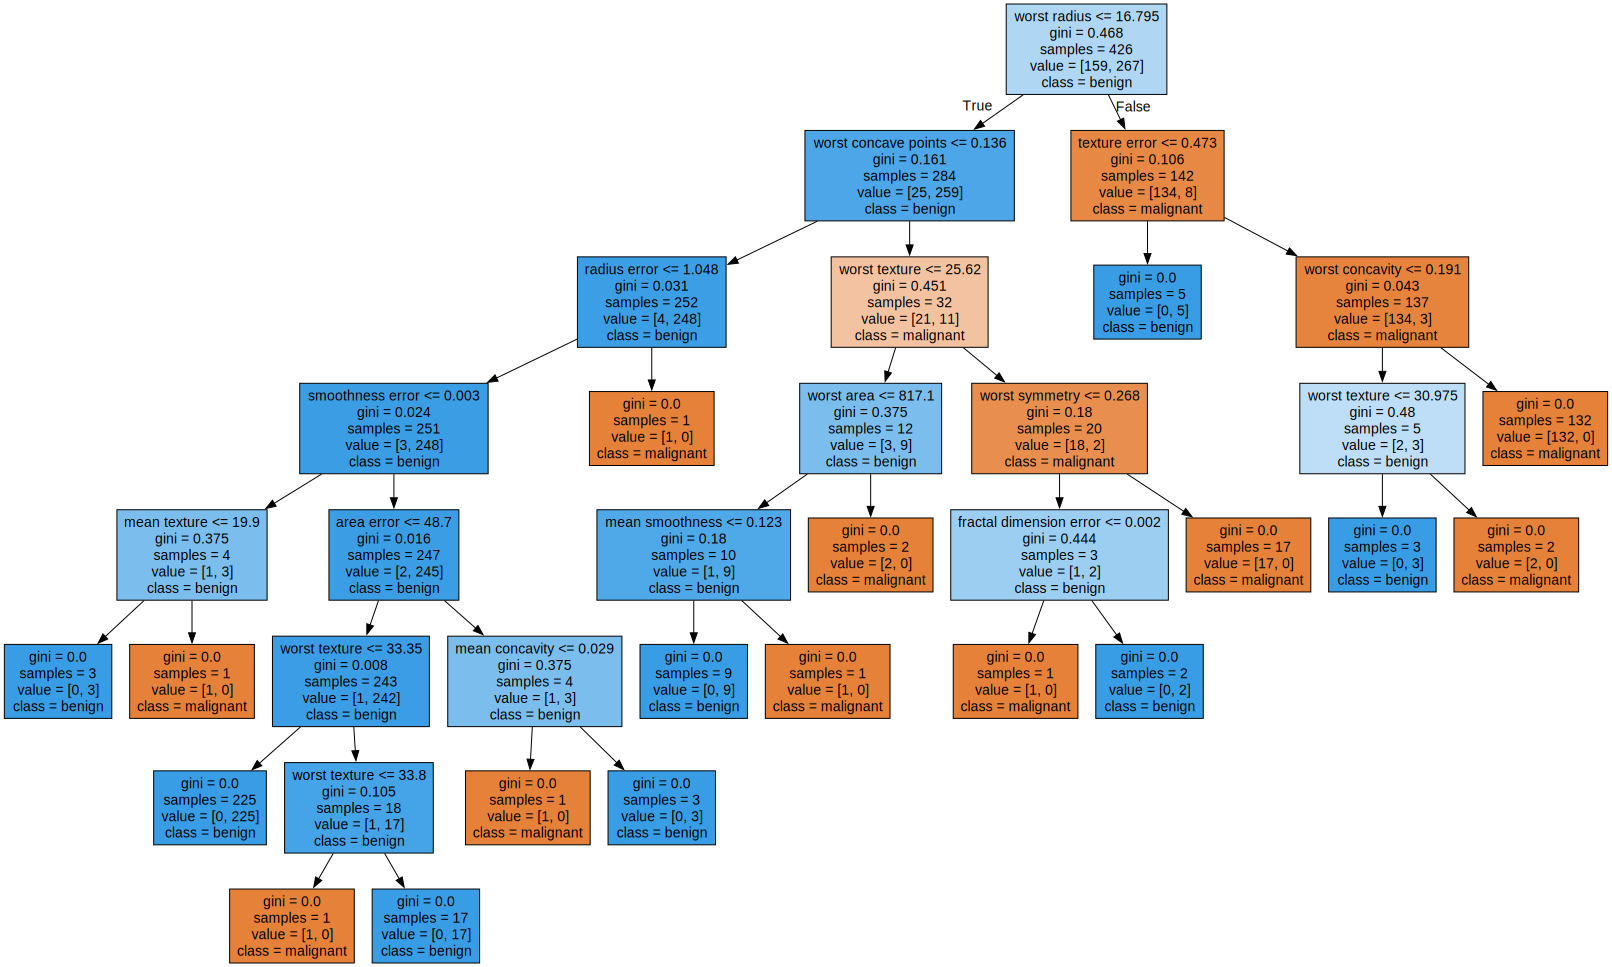

In [16]:
tree_d4 = DecisionTreeClassifier(random_state=0)
tree_d4.fit(X_train, y_train)

print(f"Accuracy on training set: {tree_d4.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {tree_d4.score(X_test, y_test):.3f}")
export_graphviz(tree_d4, out_file='tree_depth4.dot', class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=True, filled=True)

with open('tree_depth4.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph)) # Overfitting occured

In [8]:
graph, *_ = pydot.graph_from_dot_file('tree_d4.dot')
graph.write_png('tree_d4.png')

Accuracy on training set: 0.986
Accuracy on test set: 0.958


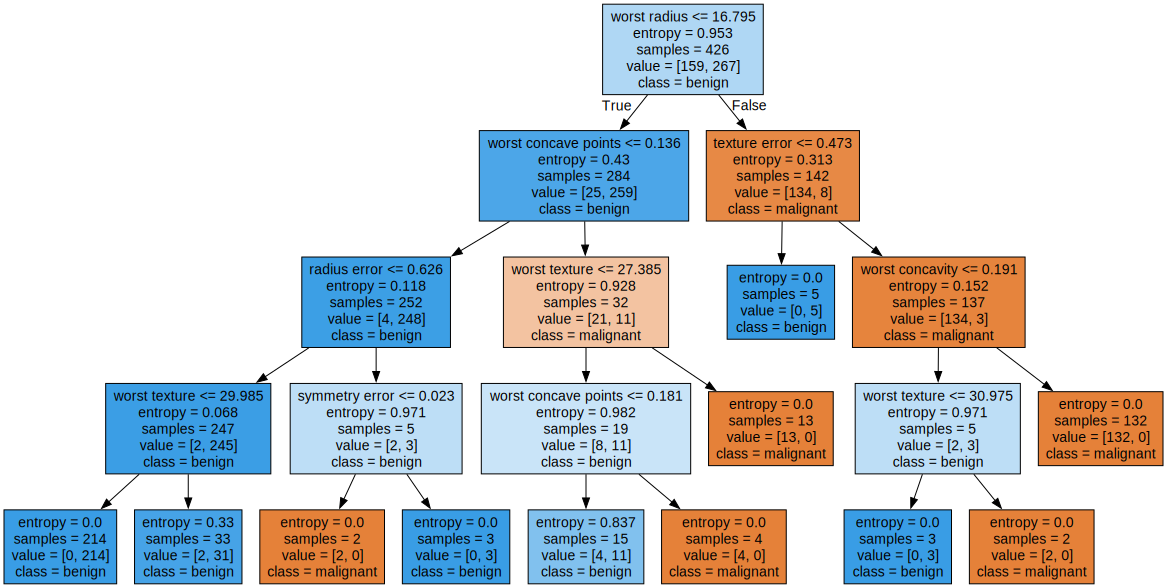

In [9]:
# try from "gini" to "entropy"
tree_d4_e = DecisionTreeClassifier(max_depth=4, criterion="entropy", random_state=0)
tree_d4_e.fit(X_train, y_train)
print(f"Accuracy on training set: {tree_d4_e.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {tree_d4_e.score(X_test, y_test):.3f}")

export_graphviz(tree_d4_e, out_file="tree_d4_e.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=True, filled=True)

with open("tree_d4_e.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Accuracy on training set: 0.974
Accuracy on test set: 0.937


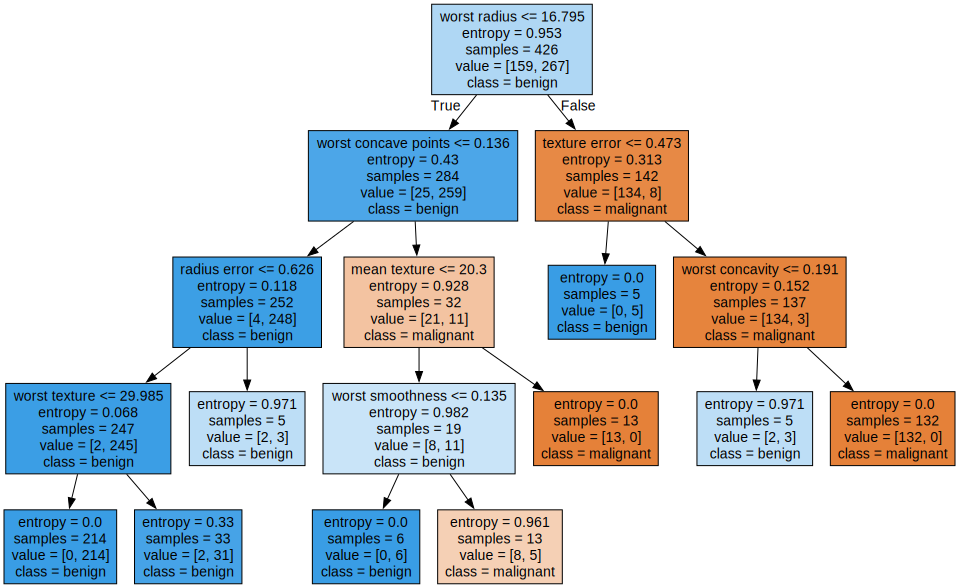

In [10]:
tree = DecisionTreeClassifier(max_depth=4, criterion="entropy", min_samples_split=6, random_state=0)
tree.fit(X_train, y_train)
print(f"Accuracy on training set: {tree.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {tree.score(X_test, y_test):.3f}")

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Accuracy on training set: 0.965
Accuracy on test set: 0.944


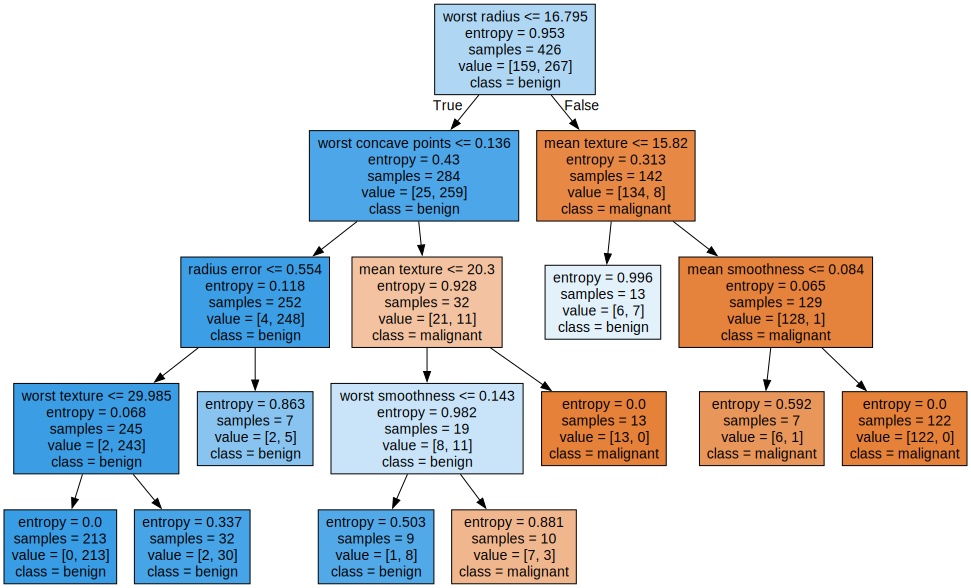

In [11]:
tree = DecisionTreeClassifier(max_depth=4, criterion="entropy", min_samples_leaf= 7, random_state=0)
tree.fit(X_train, y_train)
print(f"Accuracy on training set: {tree.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {tree.score(X_test, y_test):.3f}")

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Accuracy on training set: 0.965
Accuracy on test set: 0.958


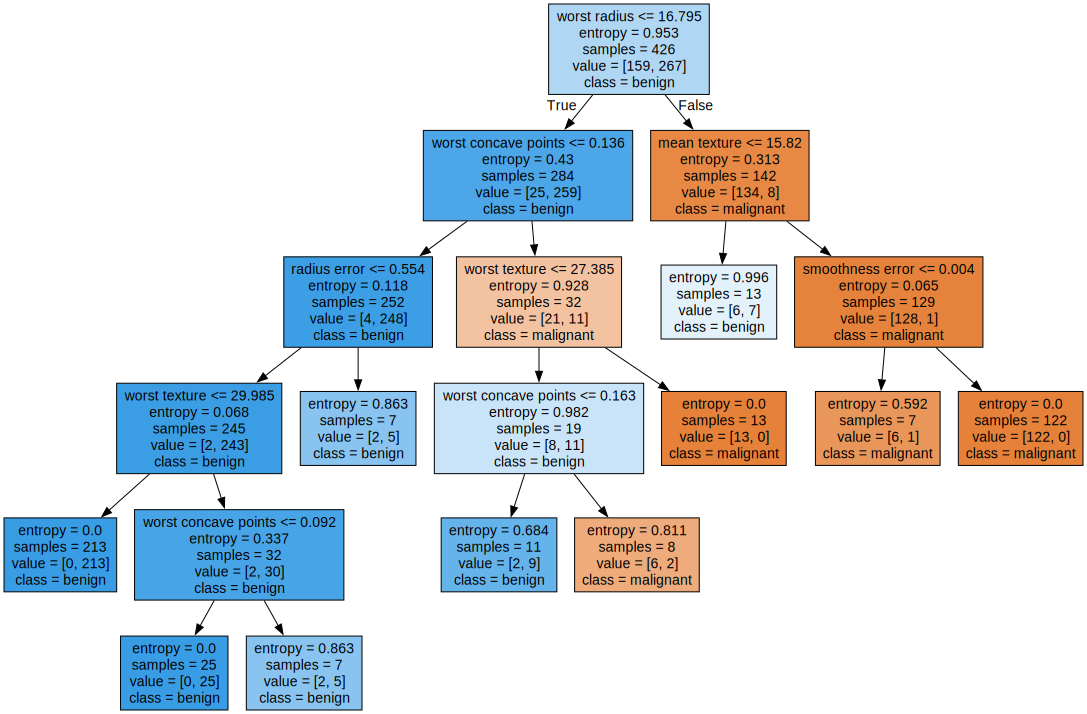

In [12]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=7, random_state=0)
tree.fit(X_train, y_train)
print(f"Accuracy on training set: {tree.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {tree.score(X_test, y_test):.3f}")

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Accuracy on training set: 0.958
Accuracy on test set: 0.909


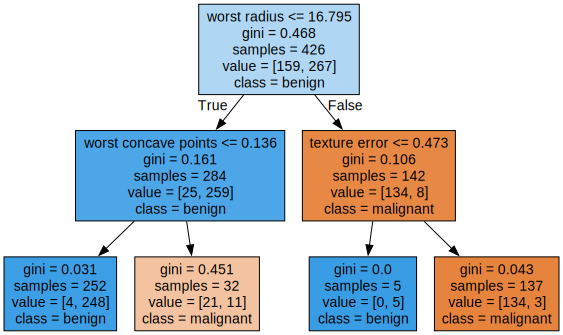

In [13]:
tree = DecisionTreeClassifier(max_leaf_nodes= 4, random_state=0)
tree.fit(X_train, y_train)
print(f"Accuracy on training set: {tree.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {tree.score(X_test, y_test):.3f}")

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## Feature Importance

In [14]:
print("Feature importances:") 
print(tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05393525
 0.         0.         0.         0.         0.         0.
 0.         0.         0.80998121 0.         0.         0.
 0.         0.         0.         0.13608354 0.         0.        ]


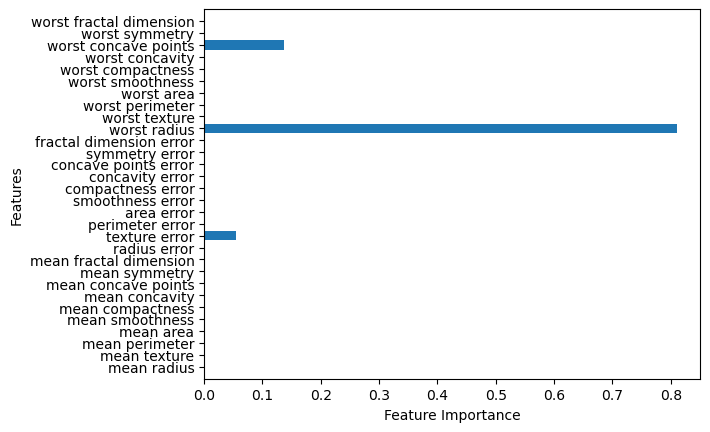

In [15]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

# Regression

Text(0, 0.5, 'Price in $/Mbyte)')

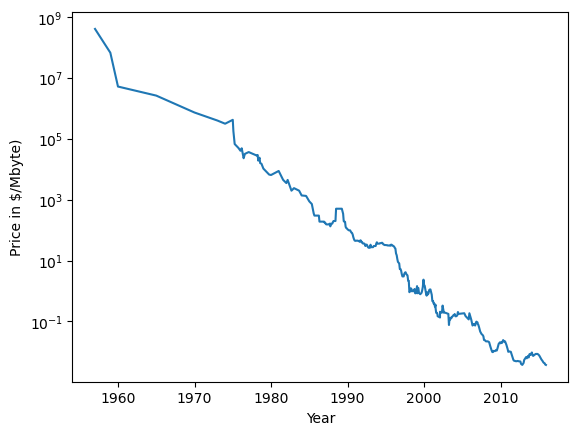

In [26]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte)")

In [28]:
display(ram_prices.head())
display(ram_prices.tail())

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


,Unnamed: 0,date,price
328,328,2015.58,0.0045
329,329,2015.67,0.0043
330,330,2015.75,0.0042
331,331,2015.83,0.0038
332,332,2015.92,0.0037


In [30]:
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

C:\Users\nsun5\AppData\Local\Temp\ipykernel_39036\3879807152.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
C:\Users\nsun5\AppData\Local\Temp\ipykernel_39036\3879807152.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


In [31]:
data_train.date

0      1957.00
1      1959.00
2      1960.00
3      1965.00
4      1970.00
        ...   
197    1999.50
198    1999.67
199    1999.75
200    1999.83
201    1999.92
Name: date, Length: 202, dtype: float64

In [32]:
type(data_train.date)

pandas.core.series.Series

In [33]:
data_train.date.shape

(202,)

In [34]:
X_train.shape

(202, 1)

In [35]:
X_train

array([[1957.  ],
       [1959.  ],
       [1960.  ],
       [1965.  ],
       [1970.  ],
       [1973.  ],
       [1974.  ],
       [1975.  ],
       [1975.08],
       [1975.25],
       [1975.75],
       [1976.  ],
       [1976.17],
       [1976.42],
       [1976.58],
       [1977.08],
       [1978.17],
       [1978.25],
       [1978.33],
       [1978.5 ],
       [1978.58],
       [1978.75],
       [1979.  ],
       [1979.75],
       [1980.  ],
       [1981.  ],
       [1981.58],
       [1982.  ],
       [1982.17],
       [1982.67],
       [1983.  ],
       [1983.67],
       [1984.  ],
       [1984.58],
       [1985.  ],
       [1985.33],
       [1985.42],
       [1985.5 ],
       [1985.58],
       [1985.67],
       [1985.83],
       [1985.92],
       [1986.  ],
       [1986.08],
       [1986.17],
       [1986.25],
       [1986.33],
       [1986.42],
       [1986.5 ],
       [1986.58],
       [1986.67],
       [1986.75],
       [1986.92],
       [1987.  ],
       [1987.08],
       [19

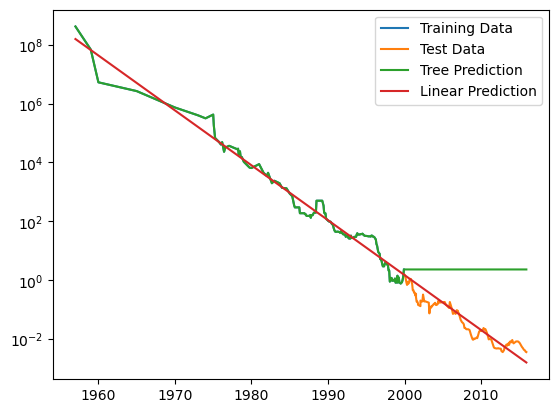

In [38]:
plt.semilogy(data_train.date, data_train.price, label="Training Data")
plt.semilogy(data_test.date, data_test.price, label="Test Data")
plt.semilogy(ram_prices.date, price_tree, label="Tree Prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear Prediction")
plt.legend()

Training Data와 Tree Prediciton(x<2000)이 정확하게 일치함.\
Overfit...

선형 회귀의 경우 2000년대 이전 데이터를 사용해서 이후 데이터를 잘 예측하지만,\
Tree는 엉망임. 그냥 쭉....

train data **범위 밖**에 있는 걸 예측할 때는 decision tree를 사용하면 안 됨.

# Regression w/ Crowdfunding

In [3]:
df = pd.read_excel("data/Crowdfunding_ex.xlsx")

In [4]:
df.head(3)

,Project ID,Title,Backers,Funded,FundedRate,Success,Country,CountryCode,ShortDescription,VideoCount,...,#ofCreation,#ofSuccess,#ofInvest,#ofInvestSuccess,보상수,#ofCommenters,#ofComments,Total_Updates,Updates_Likes,Updates_Comments
0,prjt1,Give Ear Gospel Songs by Michael hathaway — Ki...,0,0.0,0.0,NaN,"Nashville, TN",1,In order to finish my album I need 4800.00 to ...,0,...,1,0,0,0,1,0,0,0,0,0
1,prjt2,Mentally Strong Book by Michelle Jacobi — Kick...,4,1140.0,11.4,NaN,"Marsing, ID",1,"After an MS diagnosis at age 29, Michelle Jaco...",0,...,11,0,0,0,9,0,0,0,0,0
2,prjt3,High Quality Delta 3D Printer For Everybode by...,0,0.0,0.0,NaN,"Deutsch, Germany",6,"Hi, my name is Jörn. I would like to create a ...",0,...,1,0,0,0,2,0,0,0,0,0


In [5]:
X = df[['Backers', 'CountryCode', 'VideoCount', 'ImageCount', 'Goal', 'Period', 'Total_Updates']]
y = df['Funded']
X

,Backers,CountryCode,VideoCount,ImageCount,Goal,Period,Total_Updates
0,0,1,0,0,4800.00,19,0
1,4,1,0,0,10000.00,30,0
2,0,6,0,0,5361.53,30,0
3,1,9,0,3,34513.70,30,7
4,1510,1,0,39,5000.00,59,13
...,...,...,...,...,...,...,...
762,77,10,0,30,35000.00,44,1
763,32,1,0,0,15000.00,29,3
764,1050,1,0,13,28000.00,30,10
765,26,1,0,13,750.00,28,6


In [6]:
X.columns

Index(['Backers', 'CountryCode', 'VideoCount', 'ImageCount', 'Goal', 'Period',
       'Total_Updates'],
      dtype='object')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
tree = DecisionTreeRegressor().fit(X_train, y_train)
print(tree.score(X_test, y_test))
print(tree.score(X_train, y_train))

0.5496845779032242
0.9999999995623637


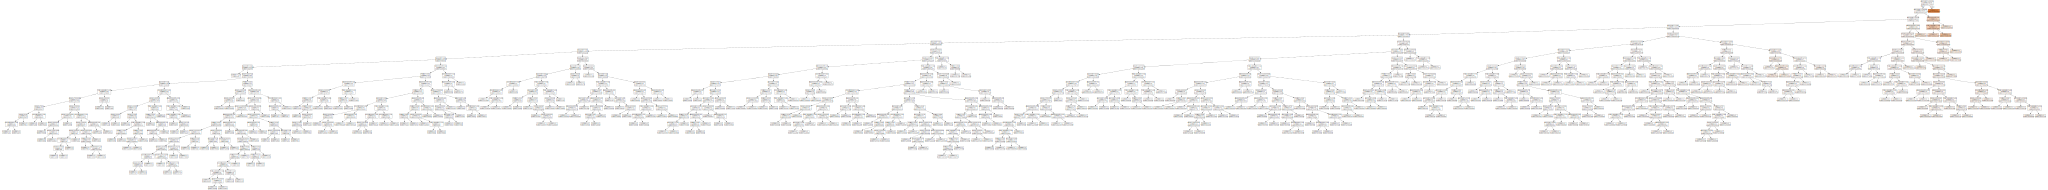

In [8]:
export_graphviz(tree, out_file="tree.dot", 
                feature_names=X.columns, impurity=False, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [9]:
graph, *_ = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')
tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.9184762966315755
0.3334727063902905


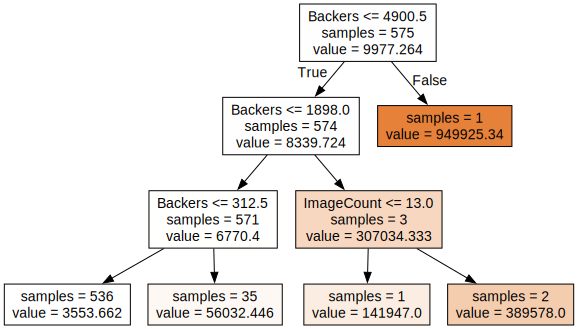

In [10]:
export_graphviz(tree, out_file="tree.dot", 
                feature_names=X.columns, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# Revisiting Imbalanced Data

In [11]:
df = pd.read_csv('data/2_fraud_ex.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [12]:
df.rename(columns = {'oldbalanceOrg':'oldbalanceOrig'}, inplace=True)
df_small = df[['type','amount','oldbalanceOrig', 'oldbalanceDest','newbalanceDest','isFraud']]
def type_replace(value):
    if value == 'CASH_IN':
        new_value = 0
    elif value == 'CASH_OUT':
        new_value = 1
    elif value == 'PAYMENT':
        new_value = 2
    elif value == 'DEBIT':
        new_value = 3
    else:
        new_value = 4
    return new_value

In [13]:
df_small['type']=df_small['type'].apply(type_replace)

C:\Users\nsun5\AppData\Local\Temp\ipykernel_29720\7914255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['type']=df_small['type'].apply(type_replace)


In [14]:
df_X=df_small.drop(columns=['isFraud'])
df_y=df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=0, stratify=df_y)
print(y_train.value_counts())

0    4765805
1       6160
Name: isFraud, dtype: int64


In [15]:
tree = DecisionTreeClassifier(random_state=0, max_depth=1)
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test)) # 어차피 Non-fraud로 찍어도 거의 맞추니...

0.9987091271625002
0.9987093367197789


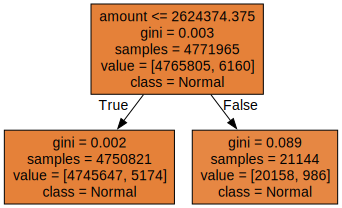

In [16]:
export_graphviz(tree, out_file="tree.dot", class_names=["Normal", "Fraud"],
                feature_names=['type','amount','oldbalanceOrig', 'oldbalanceDest','newbalanceDest'], impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

이건 뭔가 잘못됐어!
SMOTE를 쓰자..